Лабораторная работа №5

1. Линейная регрессия
   1) Разработать модель линейной регрессии, учитывающую все (в примере), 2, 3 столбца входных переменных.
   2) Рассчитать MSE.
   3) Вывести значения коэффициентов модели.

2. Полиномиальная регрессия
   1) Разработать модель линейной регрессии, базисные функции — полином от исходных значений.
   2) Найти зависимость MSE от максимальной степени полинома. (max_pow <= 10).

3. Регуляризация. Гребневая регрессия
   1) Выбрать оптимальную степень полинома.
   2) Построить график зависимости максимального модуля параметров.
   3) Построить график зависимости MSE от величины alpha.

4. Регуляризация. Лассо (linear_model.Lasso(alpha=0.1
   1) Выбрать оптимальную степень полинома.
   2) Построить график зависимости максимального модуля параметров.
   3) Построить график зависимости MSE от величины alpha.

5. SVR
   1) Исследовать точность модели регрессии при применении ядерных функций 'poly', 'sigmoid'.
   2) Реализовать модель SVR, учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import math
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Advertising (1).csv', index_col=0)
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train[['TV', 'radio', 'newspaper']], y_train)
y_pred1 = model1.predict(X_test[['TV', 'radio', 'newspaper']])
mse1 = mean_squared_error(y_test, y_pred1)

In [5]:
# Model 2:(TV, radio)
model2 = LinearRegression()
model2.fit(X_train[['TV', 'radio']], y_train)
y_pred2 = model2.predict(X_test[['TV', 'radio']])
mse2 = mean_squared_error(y_test, y_pred2)

In [6]:
# Model 3: (TV, radio, newspaper)
model3 = LinearRegression()
model3.fit(X_train[['TV', 'radio', 'newspaper']], y_train)
y_pred3 = model3.predict(X_test[['TV', 'radio', 'newspaper']])
mse3 = mean_squared_error(y_test, y_pred3)


In [7]:

print("Model 1 (All features):")
print(f"Coefficients: {dict(zip(['TV', 'radio', 'newspaper'], model1.coef_))}")
print(f"Intercept: {model1.intercept_:.4f}")
print(f"MSE: {mse1:.4f}\n")

print("Model 2 (TV, radio):")
print(f"Coefficients: {dict(zip(['TV', 'radio'], model2.coef_))}")
print(f"Intercept: {model2.intercept_:.4f}")
print(f"MSE: {mse2:.4f}\n")

print("Model 3 (TV, radio, newspaper):")
print(f"Coefficients: {dict(zip(['TV', 'radio', 'newspaper'], model3.coef_))}")
print(f"Intercept: {model3.intercept_:.4f}")
print(f"MSE: {mse3:.4f}")

Model 1 (All features):
Coefficients: {'TV': 0.044729517468716326, 'radio': 0.18919505423437652, 'newspaper': 0.0027611143413671935}
Intercept: 2.9791
MSE: 3.1741

Model 2 (TV, radio):
Coefficients: {'TV': 0.04472830196637739, 'radio': 0.19066726454072783}
Intercept: 3.0283
MSE: 3.1379

Model 3 (TV, radio, newspaper):
Coefficients: {'TV': 0.044729517468716326, 'radio': 0.18919505423437652, 'newspaper': 0.0027611143413671935}
Intercept: 2.9791
MSE: 3.1741


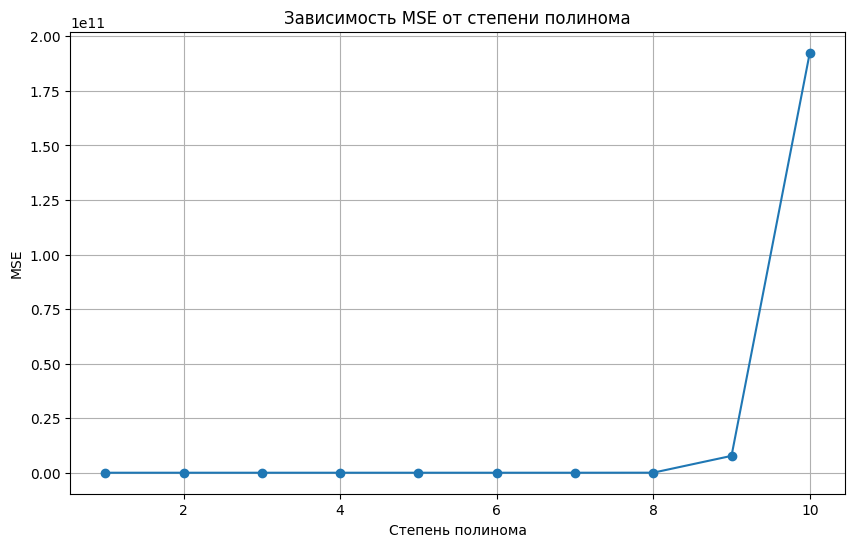

Оптимальная степень полинома: 3
Минимальное значение MSE: 0.2946


In [8]:
# Создание списка для хранения MSE
mse_scores = []

# Перебор степеней полинома
for degree in range(1, 11):
    # Создание полиномиальных признаков
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Обучение модели
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Предсказание и расчет MSE
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Визуализация зависимости MSE от степени полинома
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_scores, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.grid(True)
plt.show()

# Вывод оптимальной степени полинома
optimal_degree = np.argmin(mse_scores) + 1
print(f"Оптимальная степень полинома: {optimal_degree}")
print(f"Минимальное значение MSE: {min(mse_scores):.4f}")


In [9]:
# Функция для оценки модели с разными степенями полинома
def evaluate_polynomial_degrees(X, y, max_degree=5, alpha=1.0):
    mse_scores = []
    max_params = []

    for degree in range(1, max_degree + 1):
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        # Разделение данных
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

        # Обучение модели
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)

        # Оценка модели
        y_pred = ridge.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Максимальный модуль параметров
        max_params.append(np.max(np.abs(ridge.coef_)))

    return mse_scores, max_params


In [10]:
# Анализ зависимости от степени полинома
degrees = range(1, 6)
mse_scores, max_params = evaluate_polynomial_degrees(X, y)

c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.79908e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.24848e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.58819e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [11]:
# Анализ зависимости от alpha
alphas = np.logspace(-3, 3, 20)
optimal_degree = np.argmin(mse_scores) + 1
mse_alpha = []
max_params_alpha = []

for alpha in alphas:
    poly = PolynomialFeatures(degree=optimal_degree)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    mse_alpha.append(mean_squared_error(y_test, y_pred))
    max_params_alpha.append(np.max(np.abs(ridge.coef_)))

c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.79908e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.02756e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.19531e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.68068e-19): result may not be accurate.
  return linalg.solve

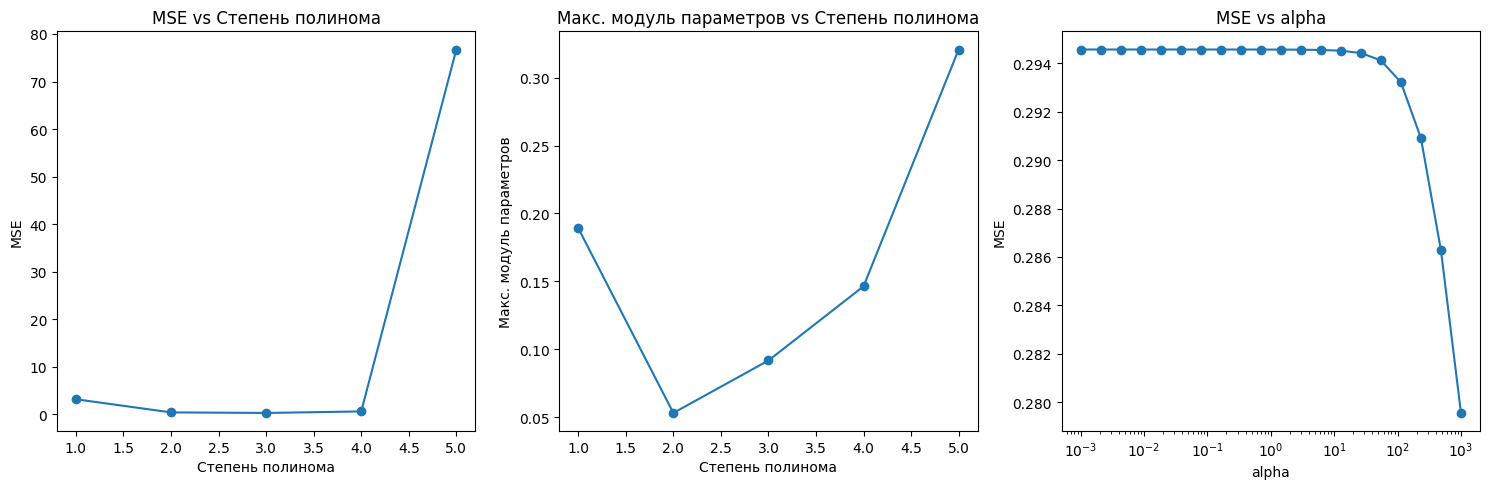

Оптимальная степень полинома: 3


In [12]:
# Визуализация результатов
plt.figure(figsize=(15, 5))

# График зависимости MSE от степени полинома
plt.subplot(131)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('MSE vs Степень полинома')

# График зависимости максимального модуля параметров
plt.subplot(132)
plt.plot(degrees, max_params, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Макс. модуль параметров')
plt.title('Макс. модуль параметров vs Степень полинома')

# График зависимости MSE от alpha
plt.subplot(133)
plt.semilogx(alphas, mse_alpha, marker='o')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs alpha')

plt.tight_layout()
plt.show()

print(f"Оптимальная степень полинома: {optimal_degree}")

In [13]:
def evaluate_polynomial_degrees_01(X, y, max_degree=5, alpha=0.1):
    mse_scores = []
    max_params = []

    for degree in range(1, max_degree + 1):
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        # Разделение данных
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

        # Обучение модели
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)

        # Оценка модели
        y_pred = lasso.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Максимальный модуль параметров
        max_params.append(np.max(np.abs(lasso.coef_)))

    return mse_scores, max_params

In [14]:
# Анализ зависимости от степени полинома
degrees = range(1, 6)
mse_scores, max_params = evaluate_polynomial_degrees_01(X, y)

c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [15]:
# Анализ зависимости от alpha
alphas = np.logspace(-3, 3, 20)
optimal_degree = np.argmin(mse_scores) + 1
mse_alpha = []
max_params_alpha = []

for alpha in alphas:
    poly = PolynomialFeatures(degree=optimal_degree)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    mse_alpha.append(mean_squared_error(y_test, y_pred))
    max_params_alpha.append(np.max(np.abs(lasso.coef_)))

c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.819e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\fbidn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

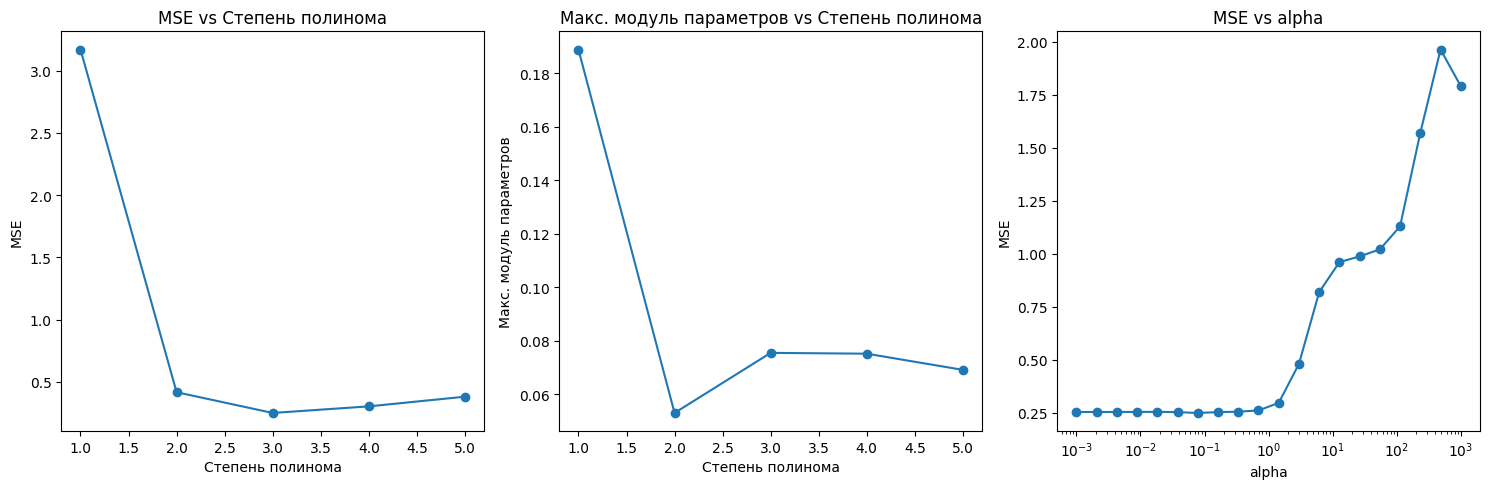

Оптимальная степень полинома: 3


In [16]:
# Визуализация результатов
plt.figure(figsize=(15, 5))

# График зависимости MSE от степени полинома
plt.subplot(131)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('MSE vs Степень полинома')

# График зависимости максимального модуля параметров
plt.subplot(132)
plt.plot(degrees, max_params, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Макс. модуль параметров')
plt.title('Макс. модуль параметров vs Степень полинома')

# График зависимости MSE от alpha
plt.subplot(133)
plt.semilogx(alphas, mse_alpha, marker='o')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs alpha')

plt.tight_layout()
plt.show()

print(f"Оптимальная степень полинома: {optimal_degree}")

In [17]:
# Масштабирование данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [18]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


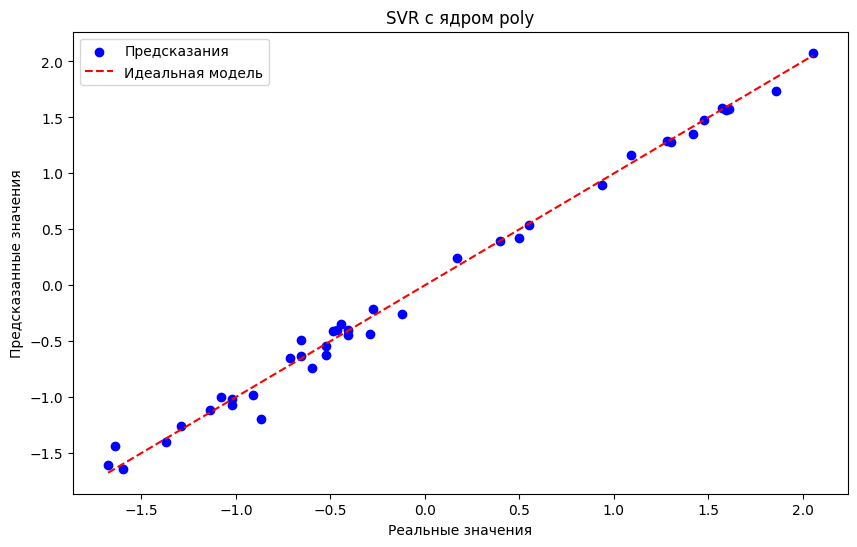

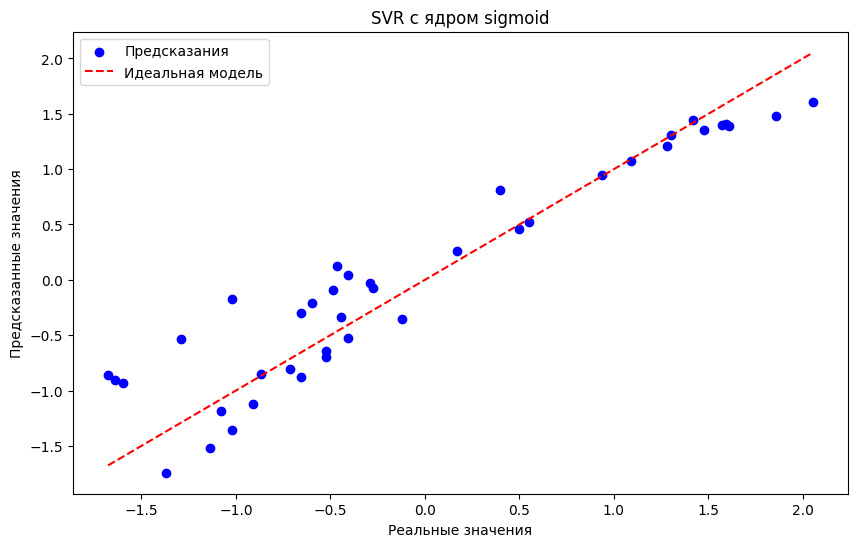

In [19]:
from sklearn.metrics import r2_score
# Исследование разных ядерных функций
kernels = ['poly', 'sigmoid']
results = {}

for kernel in kernels:
    # Определение параметров для поиска
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'degree': [2, 3, 4] if kernel == 'poly' else [0],
        'coef0': [0, 0.1, 1] if kernel in ['poly', 'sigmoid'] else [0]
    }

    # Создание и обучение модели с поиском параметров
    svr = SVR(kernel=kernel)
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Предсказание и оценка
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[kernel] = {
        'best_params': grid_search.best_params_,
        'mse': mse,
        'r2': r2
    }

    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеальная модель')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'SVR с ядром {kernel}')
    plt.legend()
    plt.show()

In [20]:
# Вывод результатов
for kernel in kernels:
    print(f"\nРезультаты для ядра {kernel}:")
    print(f"Лучшие параметры: {results[kernel]['best_params']}")
    print(f"MSE: {results[kernel]['mse']:.4f}")
    print(f"R2 score: {results[kernel]['r2']:.4f}")

# Выбор оптимальной модели
best_kernel = min(results.items(), key=lambda x: x[1]['mse'])[0]
print(f"\nОптимальная модель: SVR с ядром {best_kernel}")


Результаты для ядра poly:
Лучшие параметры: {'C': 0.1, 'coef0': 1, 'degree': 4, 'gamma': 'auto'}
MSE: 0.0085
R2 score: 0.9927

Результаты для ядра sigmoid:
Лучшие параметры: {'C': 100, 'coef0': 0, 'degree': 0, 'gamma': 0.01}
MSE: 0.1331
R2 score: 0.8858

Оптимальная модель: SVR с ядром poly
